# Matplotlib.pyplot c.d. - inne dostępne wykresy

## Wykres konturowy

`plt.countour()` - wykres konturowy (poziomicowy). Szkicuje poziomice na podstawie zadanej macierzy dwuwymiarowej reprezentującej wartości danej wielkości na płaszczyźnie XY (pierwszy wiersz - położenie najniższe, ostatni wiersz - najwyższe). Wartości liczbowe poziomic musimy zadać oddzielnie funkcją `plt.clabel()`.

Przykład:

<a list of 13 text.Text objects>

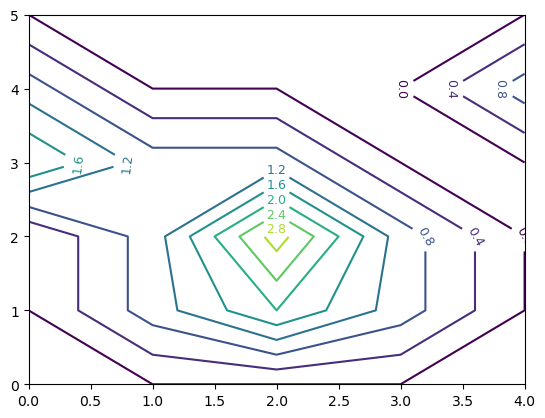

In [1]:
import numpy as np
import matplotlib.pyplot as plt

A=np.array([[0,0,0,0,0],
            [0,1,2,1,0],
            [0,1,3,1,0],
            [2,1,1,0,0],
            [1,0,0,0,1],
            [0,0,0,0,0]])
Con=plt.contour(A)
plt.clabel(Con,inline=1,fontsize=9,fmt='%1.1f')

Zamiast domyślnego wyboru poziomic możemy zadać poziomy ręcznie:

<a list of 5 text.Text objects>

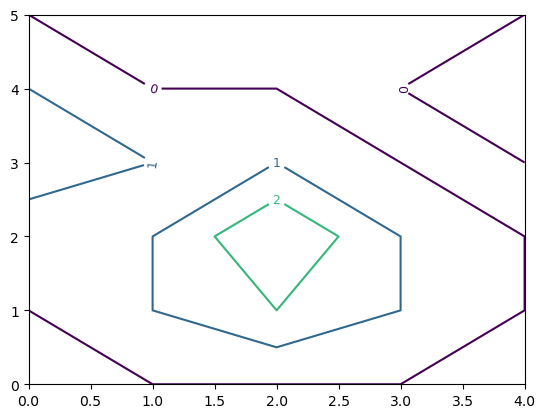

In [2]:
Con=plt.contour(A,[0,1,2,3])
plt.clabel(Con,inline=1,fontsize=9,fmt='%1.f')

Funkcją bliźniaczą do `countour` jest `contourf`, która zamiast poziomic tworzy mapę barwną poziomów. Najczęściej używa się jej w komplecie z funkcją `contour` do stworzenia wykresu przypominającego klasyczną mapę topograficzną.

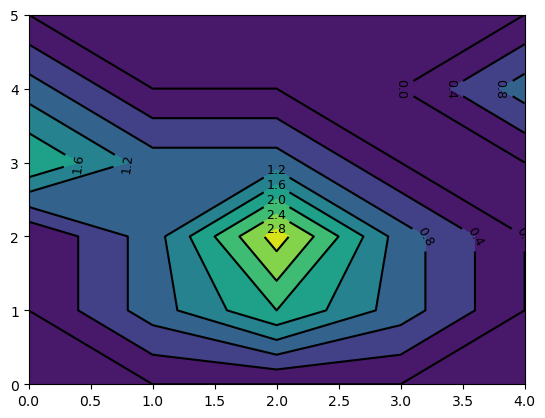

In [3]:
Con=plt.contour(A,colors='k')
plt.clabel(Con,inline=1,fontsize=9,fmt='%1.1f')
plt.contourf(A)

Sam wykres `contourf` stosuje się np. przy obrazowaniu temperatur powierzchni:

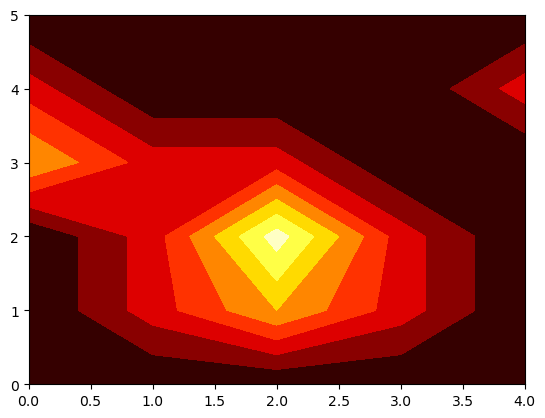

In [4]:
plt.contourf(A,cmap=plt.cm.hot)

## Wykres Gantta

`plt.broken_barh(zakresy_x,zakres_y)` - harmonogram (wykres Gantta). `Zakres_y` zadajemy w postaci pary `(y_start,y_wysokosc)`, natomiast `zakresy_x` to sekwencja (lista, wektor) par `(x_start,x_dlugosc)`.

Przykład:

([<matplotlib.axis.XTick at 0x7f6bfee6a3b0>,
 [Text(0, 0, '98'),
  Text(2, 0, '00'),
  Text(3, 0, '01'),
  Text(6, 0, '04'),
  Text(9, 0, '07'),
  Text(14, 0, 'obecnie')])

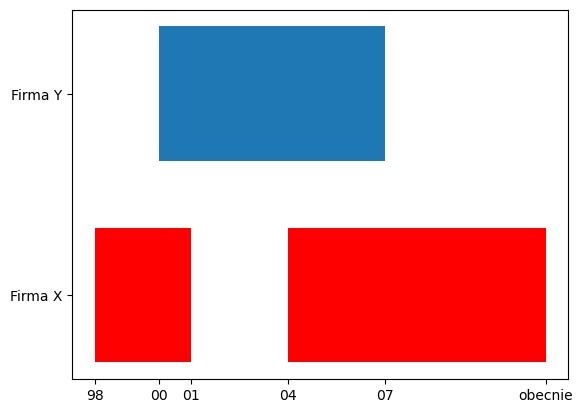

In [5]:
plt.broken_barh([(0,3),(6,8)],(1,1),facecolor='r')
plt.broken_barh([(2,7)],(2.5,1))
plt.yticks([1.5,3],['Firma X','Firma Y'])
plt.xticks([0,2,3,6,9,14],['98','00','01','04','07','obecnie'])

## Wykres rastrowy

`plt.eventplot(pozycje, orientation='horizontal', lineoffsets=1, linelengths=1, linewidths=None, colors=None, linestyles='solid')` - wykres rastrowy (dywanowy) służy do graficznej reprezentacji zdarzeń w pewnej relacji czasowej, np. przyjście klienta do sklepu o danej godzinie na przestrzeni tygodnia.

Przykład:

([<matplotlib.axis.YTick at 0x7f6bfecc7c70>,
 [Text(0, 8.0, '8:00'),
  Text(0, 8.3, '8:15'),
  Text(0, 8.6, '8:30'),
  Text(0, 8.9, '8:45')])

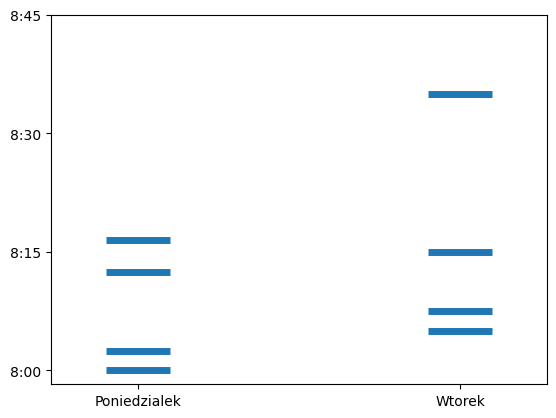

In [6]:
plt.eventplot([8,8.05,8.25,8.33],orientation='vertical',linelengths=0.1,
              linewidths=5)
plt.eventplot([8.15,8.1,8.3,8.7],orientation='vertical',linelengths=0.1,
              lineoffsets=1.5,linewidths=5)
plt.xticks([1,1.5],['Poniedzialek','Wtorek'])
plt.yticks([8,8.3,8.6,8.9],['8:00','8:15','8:30','8:45'])

## Pole wektorowe

`plt.quiver(X, Y, U, V, C)` - szkicuje pole wektorowe (przydatne w fizyce i w równaniach różniczkowych). `U` oraz `V` są argumentami obowiązkowymi, gdzie `U` to macierz pierwszych współrzędnych wektorów a `V` - macierz drugich współrzędnych. Macierze `X` (pierwsze współrzędne położeń początków wektorów) oraz `Y` (drugie współrzędne) są opcjonalne - w przypadku ich braku zostanie utworzona jednorodna siatka wektorów. `C` jest opcjonalną macierzą kolorów wektorów.

Przykład:

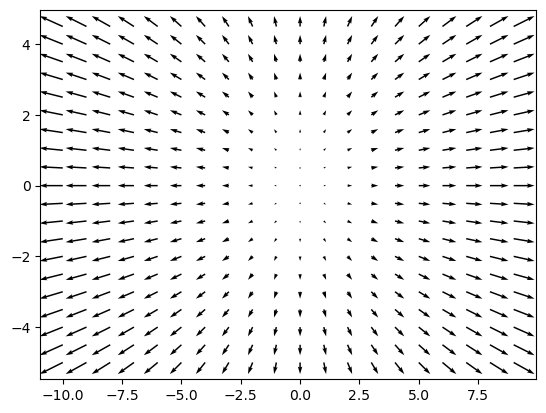

In [7]:
X=np.arange(-10,10,1)
Y=np.arange(-5,5,0.5)

U,V=np.meshgrid(X,Y)

plt.quiver(X,Y,U,V)

## Korelacja


- `plt.xcorr(x,y)` - wykres korelacji między danymi `x` i `y`
- `plt.acorr(x)` - wykres autokorelacji danych

Przykład:

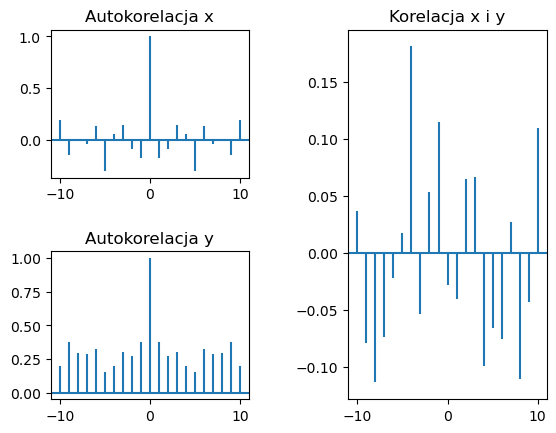

In [8]:
x=np.random.randn(100)
y=2+3*np.random.randn(100)


plt.subplot(221)
plt.acorr(x)
plt.title('Autokorelacja x')
plt.subplot(223)
plt.acorr(y)
plt.title('Autokorelacja y')
plt.subplot(122)
plt.xcorr(x,y)
plt.title('Korelacja x i y')

plt.subplots_adjust(wspace=0.5, hspace=0.5)

## Analiza sygnałów

- `plt.specgram(x,NFFT,Fs)` - spektrogram, czyli wykres widma amplitudowego sygnału. `NFFT`, czyli liczba punktów brana w każdym bloku do szybkiej transformaty Fouriera (najlepiej $2^n$) oraz `Fs`, czyli częstotliwość próbkowania są konieczne, jeżeli chcemy uzyskać sensowny spektrogram.
- `plt.angle_spectrum(x)` - widmo kątowe
- `plt.magnitude_spectrum()` - widmo magnitudy
- `plt.phase_spectrum(x)` - widmo fazy
- `plt.psd(x)` - widmowa gęstość mocy
- `plt.csd(x,y)` - krzyżowa gęstość widmowa (dla dwóch sygnałów)
- `plt.cohere(x,y)` - wykres koherencji między sygnałami `x` i `y`


Analiza przykładowego sygnału danego macierzą `x`:

(array([0.31930976, 1.01448753, 0.80853357, 0.74640347, 0.61168321,
        0.86267573, 0.96614986, 0.84771671, 0.81512687, 0.77776353,
        0.53240958, 0.4438996 , 0.78857775, 0.86541867, 0.4022392 ,
        0.9194369 , 1.05280034, 0.6207705 , 1.83232433, 0.70315799,
        1.74460453, 1.64553695, 0.73369103, 0.39375712, 0.49388974,
        0.90833941, 0.96497133, 1.04584088, 1.22434392, 0.78040741,
        0.25195983, 0.61567352, 0.97517891, 1.46887741, 1.01518798,
        0.74600814, 0.72378015, 0.67855817, 1.47915308, 1.04494565,
        0.63111522, 0.76173783, 0.56925912, 0.8068674 , 0.8011396 ,
        0.58236378, 0.67734203, 1.12786232, 1.18656563, 1.67924547,
        1.63409459, 0.62736519, 0.84048993, 1.11577512, 1.71636254,
        1.15983266, 0.87342926, 1.92370256, 1.01347087, 0.68552353,
        1.57856519, 2.26125216, 1.64484414, 0.77313157, 0.73313561,
        0.40544848, 0.52488347, 0.83076886, 1.52238213, 0.60508101,
        1.1932442 , 1.81751423, 1.20955533, 0.98

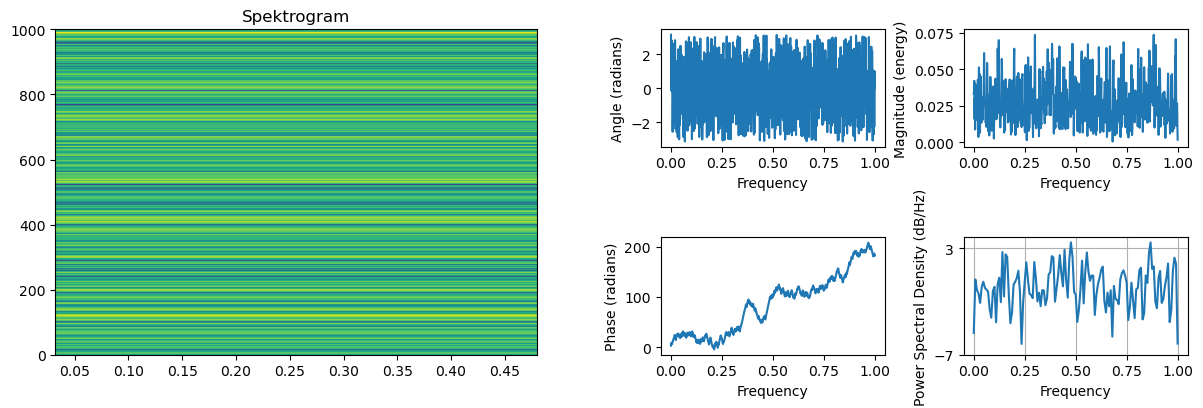

In [9]:
x=np.random.randn(1500)

plt.figure(figsize=(12,4))

plt.subplot(121)
plt.specgram(x, NFFT=1024, Fs=int(1.0/0.0005))
plt.title('Spektrogram')
plt.subplot(243)
plt.tight_layout(pad=0.4, w_pad=0.3, h_pad=3)
plt.angle_spectrum(x)
plt.subplot(244)
plt.tight_layout(pad=0.4, w_pad=0.3, h_pad=3)
plt.magnitude_spectrum(x)
plt.subplot(247)
plt.tight_layout(pad=0.4, w_pad=0.3, h_pad=3)
plt.phase_spectrum(x)
plt.subplot(248)
plt.tight_layout(pad=0.4, w_pad=0.3, h_pad=3)
plt.psd(x)

## Zadanie 1.

Jaś, Staś, Ola i Alicja pracują w małej prywatnej firmie. W poniedziałek Jasiowi uciekł autobus i spóźnił się do pracy prawie godzinę, co wywołało wściekłość szefa. Jasiowi grozi zwolnienie. Jesteś szefem działu HR. Na podstawie danych o godzinach przyjścia do pracy z pliku `godziny_przyjscia.xlsx` poszczególnych pracowników przygotuj infografikę dla szefa, która przedstawi Jasia w lepszym świetle. Godziny pracy w firmie to 9.00 - 17.00.


([<matplotlib.axis.YTick at 0x7f6bfe940190>,
 [Text(0, 0, 'Jaś'),
  Text(0, 1, 'Staś'),
  Text(0, 2, 'Ola'),
  Text(0, 3, 'Alicja')])

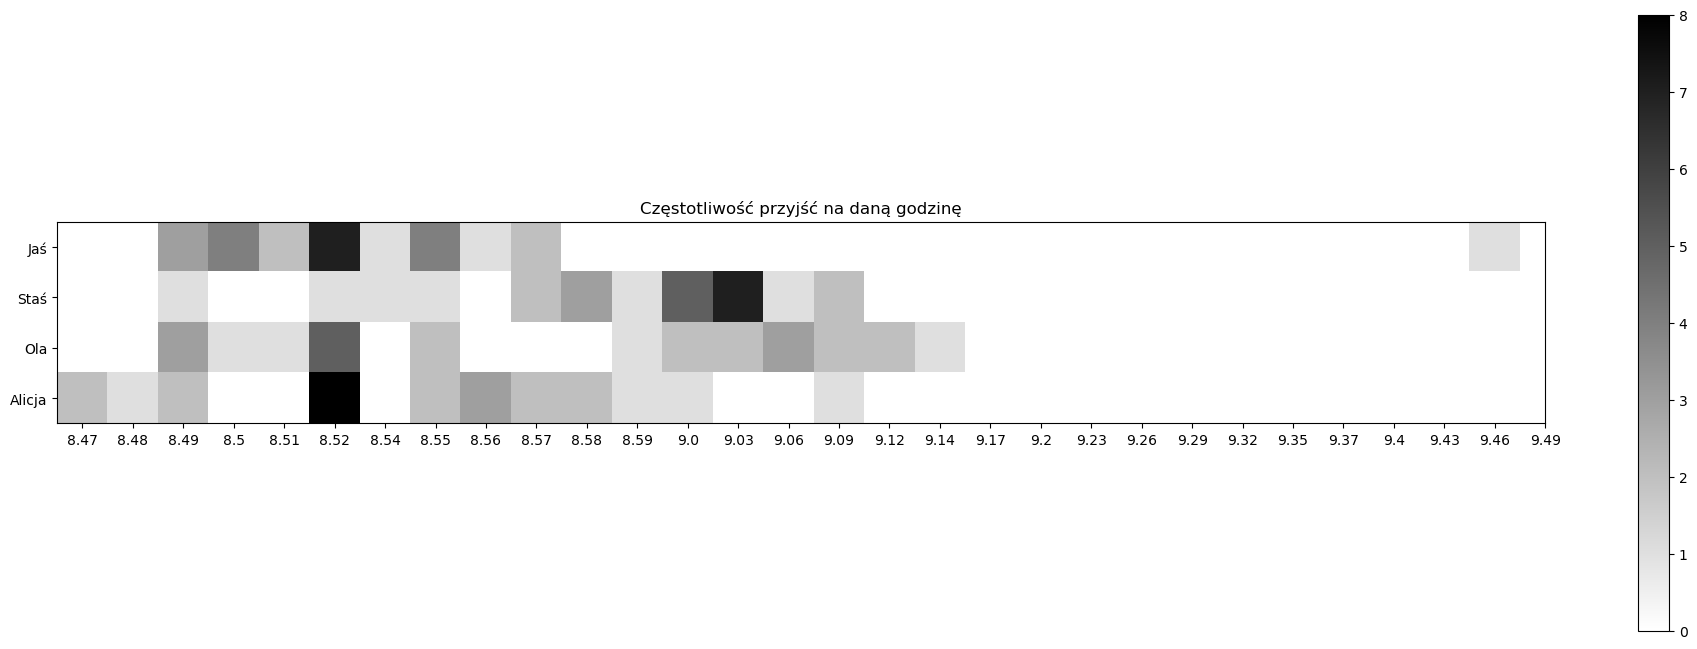

In [10]:
import pandas as pd

godziny_przyjscia=pd.read_excel('godziny_przyjscia.xlsx')
godziny_przyjscia = np.array(godziny_przyjscia.values[1:,1:],dtype = float)
bins=np.round(np.append(np.linspace(godziny_przyjscia.min(),8.59,12),np.linspace(9,godziny_przyjscia.max(),18)),2)
counts_jas=np.histogram(godziny_przyjscia[0],bins=bins)[0]
counts_stas=np.histogram(godziny_przyjscia[1],bins=bins)[0]
counts_ola=np.histogram(godziny_przyjscia[2],bins=bins)[0]
counts_alicja=np.histogram(godziny_przyjscia[3],bins=bins)[0]
final=np.array([counts_jas,counts_stas,counts_ola,counts_alicja])

plt.figure(figsize=(24,8))
plt.imshow(final,cmap='binary')
plt.title("Częstotliwość przyjść na daną godzinę")
plt.colorbar()
plt.xticks(range(len(bins)),bins)
plt.yticks(range(4),['Jaś','Staś','Ola','Alicja'])


In [11]:
godziny_przyjscia.min()

8.47

In [12]:
np.linspace(godziny_przyjscia.min(),godziny_przyjscia.max(),20)

array([8.47      , 8.52368421, 8.57736842, 8.63105263, 8.68473684,
       8.73842105, 8.79210526, 8.84578947, 8.89947368, 8.95315789,
       9.00684211, 9.06052632, 9.11421053, 9.16789474, 9.22157895,
       9.27526316, 9.32894737, 9.38263158, 9.43631579, 9.49      ])


## Zadanie 2.

Modelujesz pewną zmienną losową, która w praktyce powinna mieć rozkład normalny. Dotychczas znane dwa modele dają predykcje zapisane w macierzach w plikach `A.txt` i `B.txt`. Twój model daje predykcje z macierzy z pliku `C.txt`. Opracuj grafikę do publikacji naukowej, która zobrazuje, że Twój model jest lepszy od modeli A i B. Uwaga: pliki są do odczytu binarnego.


((array([-3.39232293, -3.14126578, -3.00201262, ...,  3.00201262,
          3.14126578,  3.39232293]),
  array([-2.92209246, -2.92073446, -2.78715709, ...,  2.82585482,
          2.84121675,  3.0273587 ])),
 (1.0120305706312327, 0.016591851748997844, 0.999521391419638))

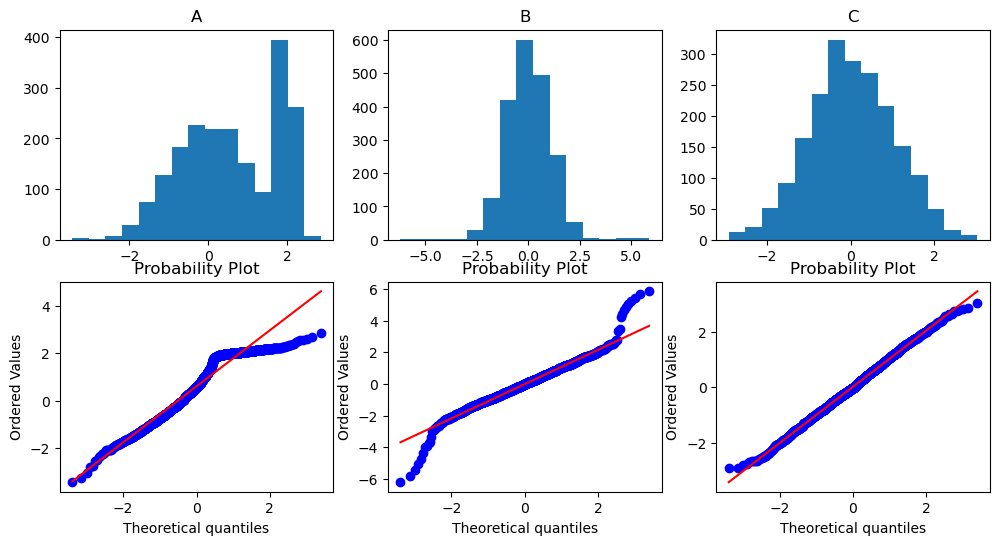

In [13]:
import scipy.stats as stats

f = open("A.txt", "rb")
A=np.frombuffer(f.read())

f = open("B.txt", "rb")
B=np.frombuffer(f.read())

f = open("C.txt", "rb")
C=np.frombuffer(f.read())

plt.figure(figsize=(12,6))

plt.subplot(2,3,1)
plt.title('A')
plt.hist(A,bins=15)
plt.subplot(2,3,2)
plt.title('B')
plt.hist(B,bins=15)
plt.subplot(2,3,3)
plt.title('C')
plt.hist(C,bins=15)
plt.subplot(2,3,4)
stats.probplot(A, dist="norm", plot=plt)
plt.subplot(2,3,5)
stats.probplot(B, dist="norm", plot=plt)
plt.subplot(2,3,6)
stats.probplot(C, dist="norm", plot=plt)


## Zadanie 3.

Na jednej grafice naszkicuj wykresy autokorelacji sygnałów B i C oraz wykres ich korelacji.


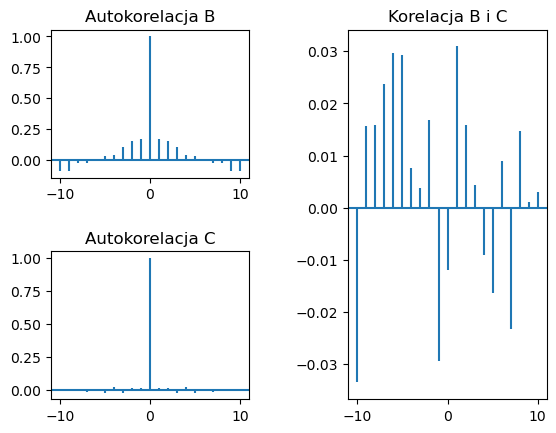

In [14]:
plt.subplot(221)
plt.acorr(B)
plt.title('Autokorelacja B')
plt.subplot(223)
plt.acorr(C)
plt.title('Autokorelacja C')
plt.subplot(122)
plt.xcorr(B,C)
plt.title('Korelacja B i C')

plt.subplots_adjust(wspace=0.5, hspace=0.5)


## Zadanie 4.

W pliku `signal1.txt` i `signal2.txt` znajdują się dane z próbkowania pewnych sygnałów wygenerowanych z `NFFT=1024`, `Fs=1./0.01` (tzn. sygnał był próbkowany co 0.01 sekundy). Dla wybranego sygnału stwórz jedną grafikę zawierającą kompletny spektrogram oraz wykresy pojedynczych widm. Dodaj podpisy pod poszczególnymi wykresami, zadbaj o estetyczne i czytelne ułożenie wykresów.


(array([1.23747986e-03, 2.01169607e-03, 1.80913706e-03, 1.23702688e-03,
        1.19458856e-03, 7.46799423e-04, 7.00508435e-04, 3.16823247e-04,
        2.16963813e-04, 9.77217470e-04, 9.04727468e-04, 6.20587863e-04,
        5.32916250e-04, 1.48099264e-04, 2.64443140e-04, 2.12740094e-04,
        1.19571080e-04, 1.81164655e-04, 1.22307402e-04, 2.74812504e-04,
        3.46102837e-04, 1.95320441e-04, 1.69259671e-04, 1.48997592e-04,
        2.49634912e-04, 2.80002196e-03, 3.86485657e-03, 6.22063601e-04,
        1.83247271e-04, 7.99472508e-05, 1.91392421e-05, 5.83233342e-05,
        7.63065060e-05, 1.10768101e-04, 6.78575804e-05, 5.07782475e-05,
        7.91423926e-05, 1.01451641e-04, 7.35567207e-05, 5.60557348e-05,
        5.82881872e-05, 8.56041289e-05, 3.32330656e-05, 3.62335519e-05,
        2.40237612e-05, 4.77490990e-05, 2.85113342e-05, 4.05133069e-05,
        5.24138289e-05, 5.40314887e-05, 3.31685438e-05, 4.08369456e-05,
        3.21682114e-05, 4.76305442e-05, 4.21754065e-05, 4.951399

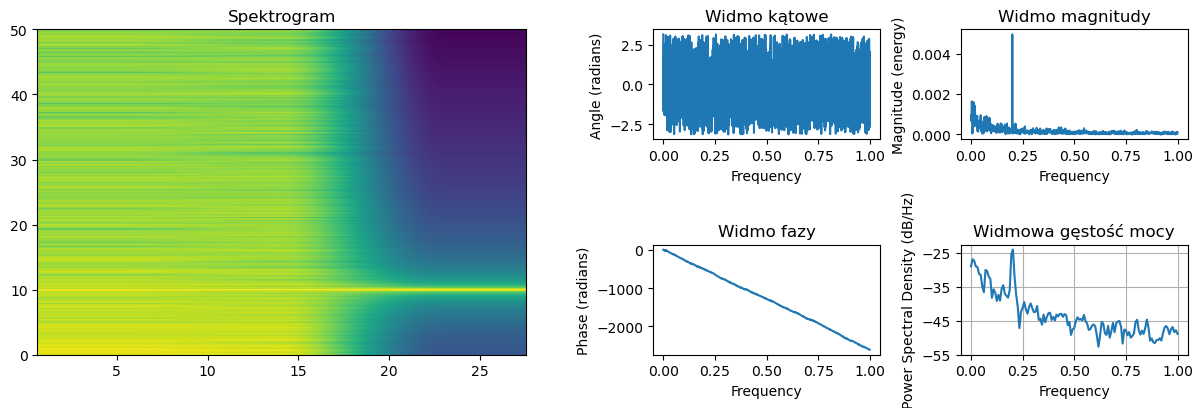

In [15]:
f = open("signal1.txt", "rb")
signal1=np.frombuffer(f.read())

f = open("signal2.txt", "rb")
signal2=np.frombuffer(f.read())


plt.figure(figsize=(12,4))

plt.subplot(121)
plt.specgram(signal1, NFFT=1024, Fs=int(1.0/0.01))
plt.title('Spektrogram')
plt.subplot(243)
plt.tight_layout(pad=0.4, w_pad=0.3, h_pad=3)
plt.title('Widmo kątowe')
plt.angle_spectrum(signal1)
plt.subplot(244)
plt.tight_layout(pad=0.4, w_pad=0.3, h_pad=3)
plt.title('Widmo magnitudy')
plt.magnitude_spectrum(signal1)
plt.subplot(247)
plt.tight_layout(pad=0.4, w_pad=0.3, h_pad=3)
plt.title('Widmo fazy')
plt.phase_spectrum(signal1)
plt.subplot(248)
plt.tight_layout(pad=0.4, w_pad=0.3, h_pad=3)
plt.title('Widmowa gęstość mocy')
plt.psd(signal1)


## Zadanie 5.

W jednej grafice umieść wykres przebiegu obydwu sygnałów `signal1.txt` i `signal2.txt` (oba na tym samym wykresie) oraz wykres ich koherencji.

(array([0.05656696, 0.23523945, 0.2136441 , 0.19648109, 0.23545059,
        0.0873106 , 0.21241204, 0.28128935, 0.21478997, 0.10548794,
        0.3080783 , 0.38922872, 0.61878643, 0.0307638 , 0.2454884 ,
        0.24855722, 0.12976749, 0.11519755, 0.23123977, 0.03302001,
        0.42939009, 0.34507619, 0.26664853, 0.41595887, 0.15139996,
        0.73001843, 0.93622958, 0.77028248, 0.6088403 , 0.1400985 ,
        0.56486894, 0.21070634, 0.30109063, 0.03476309, 0.11962217,
        0.49458772, 0.09727236, 0.00660032, 0.14636842, 0.64391467,
        0.33149119, 0.35580225, 0.0262041 , 0.35962952, 0.05813715,
        0.13060517, 0.58687572, 0.10694485, 0.34414301, 0.07584061,
        0.00178545, 0.17653983, 0.03906313, 0.03292515, 0.25205369,
        0.52818644, 0.0150832 , 0.23306749, 0.08626046, 0.2421409 ,
        0.09588018, 0.35712173, 0.18008629, 0.26450655, 0.36464213,
        0.68928217, 0.4302667 , 0.17223399, 0.39053083, 0.31420264,
        0.02678542, 0.21929773, 0.11575444, 0.39

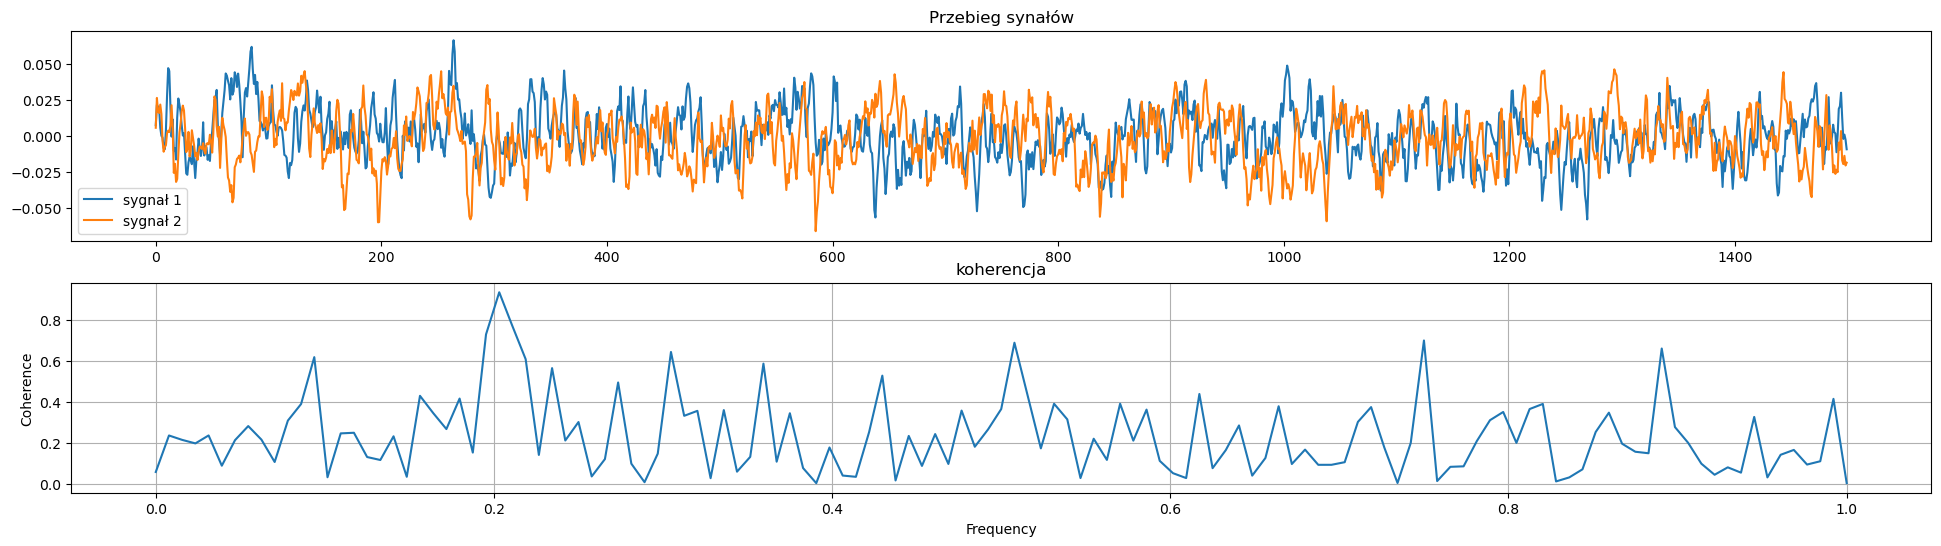

In [16]:
plt.figure(figsize=(24,6))

plt.subplot(2,1,1)
plt.title('Przebieg synałów')
plt.plot(signal1[:1500])
plt.plot(signal2[:1500])
plt.legend(['sygnał 1','sygnał 2'])
plt.subplot(2,1,2)
plt.title('koherencja')
plt.cohere(signal1[:1500],signal2[:1500])